In [2]:
import torch
from torchvision import transforms, datasets # torchvision 내의 datasets 이용하기.
BATCH_SIZE = 64

trainset = datasets.FashionMNIST(
    root = '../data/FASIONMNIST/', # 저장될 공간.
    train = True,
    download = True,
    transform = transforms.ToTensor() # array -> tensor.
)

train_loader = torch.utils.data.DataLoader( # tensor로 만들어 준 것을 pair로 만들어줌.
    dataset = trainset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2
)

In [3]:
from torch import nn, optim

class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Sequential( # 784 -> 64로 압축
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential( # 64 -> 784
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss() # 원래 데이터로 복원이 되야 하기 때문.

print("Model: ", model)
print('Device: ', DEVICE)

Model:  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cpu


In [4]:
view_data = trainset.data[:5].view(-1, 28*28) # view를 이용해 flatten 진행.
view_data = view_data.type(torch.FloatTensor) / 255.

In [7]:
# Definite Train & Evaluate
def train(model, train_loader, optimizer):
    model.train()
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28 * 28).to(DEVICE)
        y = x.view(-1, 28 * 28).to(DEVICE)
        label = label.to(DEVICE)
        
        encoded, decoded = model(x) # 위 forward에서 return.
        loss = criterion(decoded, y) # decoded와 y를 비교.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, step * len(x), len(train_loader.dataset), 100. * step / len(train_loader), loss.item()))

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.228435
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.030301
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.023132
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.020842
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.019483
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.018530
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.018657
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.018465
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.017031
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.017636
[Epoch 1]


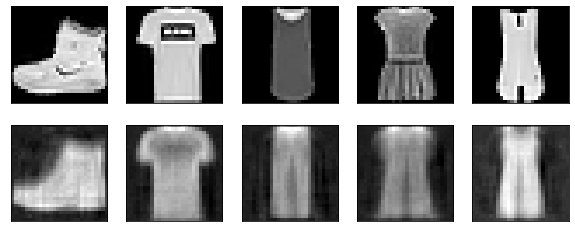

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.017969
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.018069
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.014455
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.019704
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.013866
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.014513
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.014894
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.017227
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.014267
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.015698
[Epoch 2]


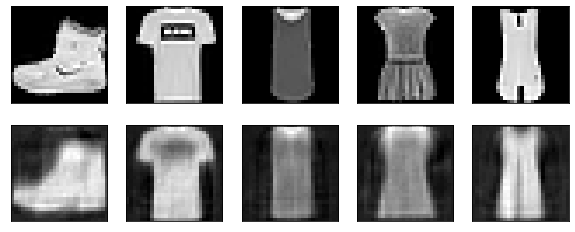

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.017260
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.017206
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.015446
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.016467
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.013210
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.013570
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.014466
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.014315
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.015303
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.015520
[Epoch 3]


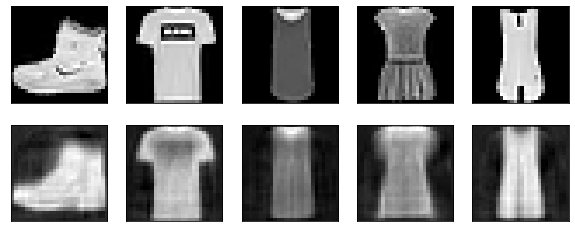

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.014254
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.013928
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.016320
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.014135
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.014873
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.014262
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.011557
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.015428
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.013089
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.014750
[Epoch 4]


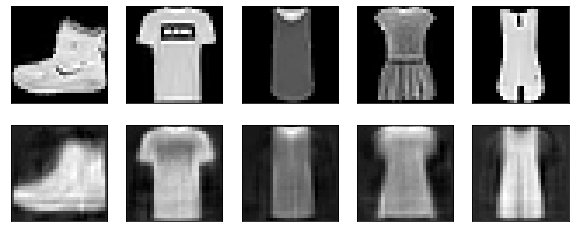

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.014596
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.014720
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.013421
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.014917
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.013948
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.013771
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.012521
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.014950
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.014496
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.014962
[Epoch 5]


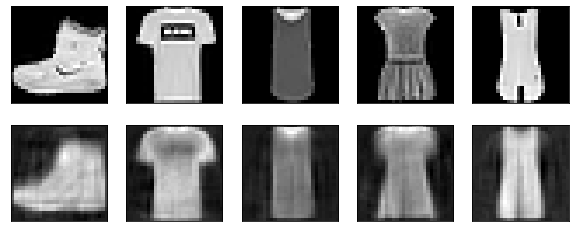

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.015590
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.014396
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.014890
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.012397
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.016159
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.014466
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.013250
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.012974
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.013647
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.012738
[Epoch 6]


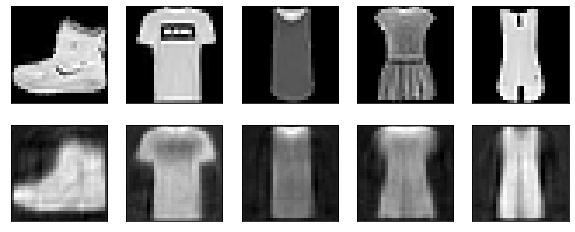

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.014541
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.015199
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.014372
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.014271
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.014239
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.013960
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.013007
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.015257
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.012969
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.014171
[Epoch 7]


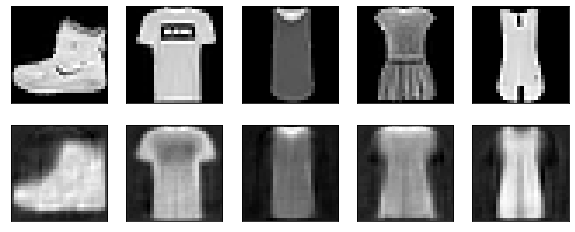

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.014738
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.014814
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.014787
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.014703
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.014706
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.013966
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.014745
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.015260
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.014446
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.014026
[Epoch 8]


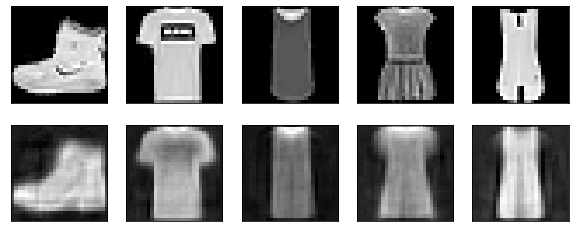

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.014348
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.014831
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.015886
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.013933
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.016041
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.014859
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.014030
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.016430
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.013369
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.014729
[Epoch 9]


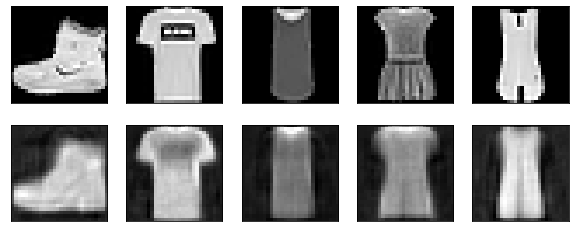

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.012422
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.014094
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.014415
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.013396
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.013814
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.012662
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.015393
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.014474
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.016095
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.013585
[Epoch 10]


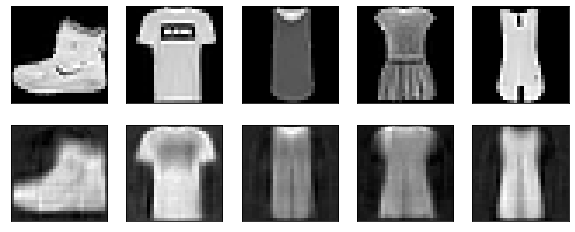

In [8]:
''' Training '''
import numpy as np
import matplotlib.pyplot as plt

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print('[Epoch {}]'.format(epoch))
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28, 28))
        a[0][idx].imshow(img, cmap = 'gray')
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
        
    for idx in range(5):
        img = np.reshape(decoded_data.to('cpu').data.numpy()[idx], (28, 28))
        a[1][idx].imshow(img, cmap = 'gray')
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()

Model:  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cpu
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.299448
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.044176
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.038662
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.030247
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.026148
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.022423
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.022714
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.026982
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.020716
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.020792
[Epoch 1]


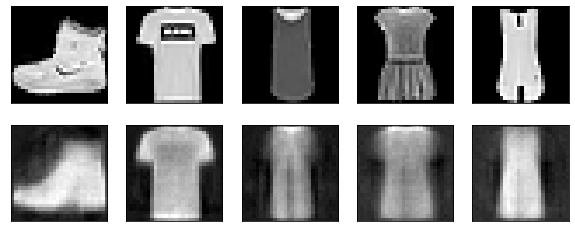

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.020412
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.021627
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.019525
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.020557
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.019243
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.018893
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.019011
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.017973
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.016167
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.016855
[Epoch 2]


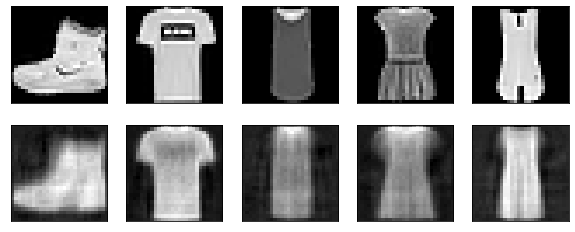

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.015243
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.017319
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.015966
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.014137
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.016048
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.014755
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.015442
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.014577
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.013156
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.012691
[Epoch 3]


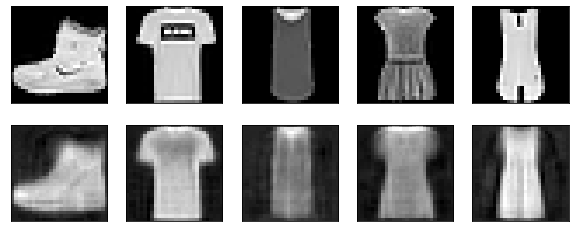

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.015658
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.014601
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.013789
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.014177
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.014140
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.011797
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.011493
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.013528
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.012211
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.012468
[Epoch 4]


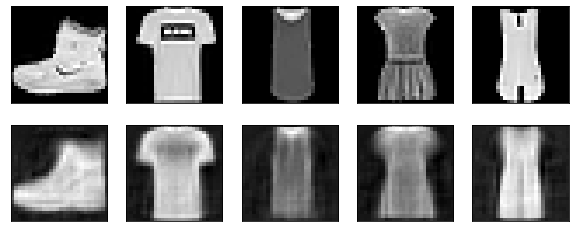

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.011469
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.013736
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.011984
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.012673
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.012793
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.010621
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.010617
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.011944
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.011737
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.012136
[Epoch 5]


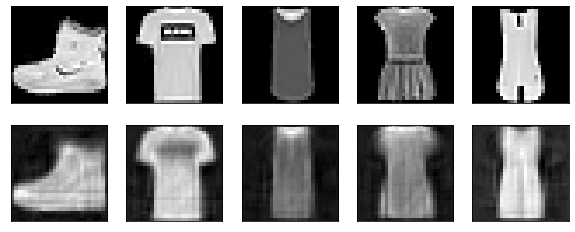

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.011171
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.013758
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.012201
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.011956
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.013001
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.012113
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.011792
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.011073
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.011587
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.012450
[Epoch 6]


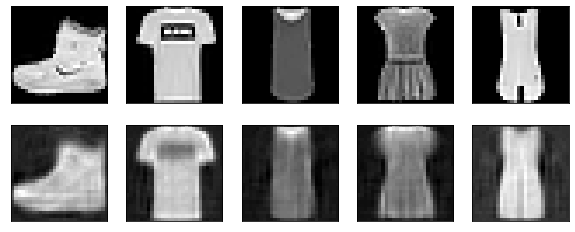

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.011534
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.012049
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.010693
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.012496
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.013093
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.011950
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.010466
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.010102
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.010526
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.011610
[Epoch 7]


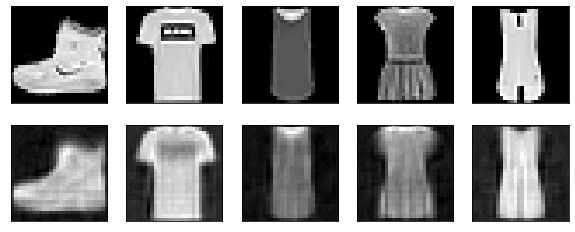

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.011664
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.011205
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.011263
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.010237
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.011132
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.009485
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.010466
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.011107
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.011079
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.011775
[Epoch 8]


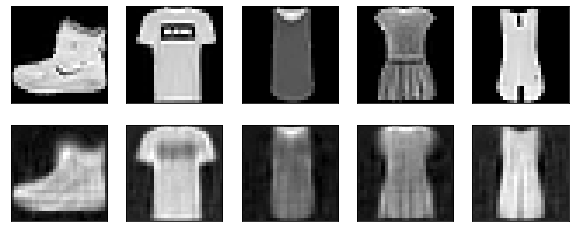

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.013269
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.011850
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.011381
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.011270
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.010972
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.010720
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.012488
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.010355
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.012328
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.011868
[Epoch 9]


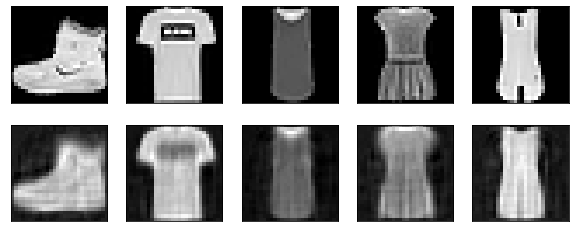

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.010975
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.010353
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.012048
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.010339
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.012194
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.010282
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.011970
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.009588
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.008881
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.012116
[Epoch 10]


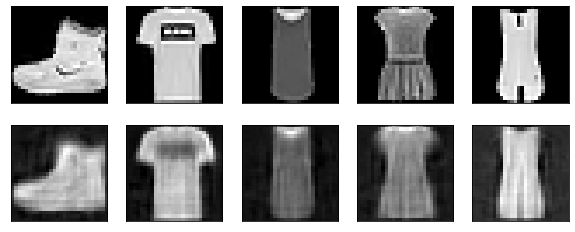

In [9]:
# ReLU 함수는 0 미만의 값을 모두 0으로 만들어버리기 때문에 복원이 잘 안되지 않을까? 하는 의문.
# Sigmoid로 변경.
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Sequential( # 784 -> 64로 압축
            nn.Linear(28*28, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential( # 64 -> 784
            nn.Linear(64, 128),
            nn.Sigmoid(),
            nn.Linear(128, 28*28),
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss() # 원래 데이터로 복원이 되야 하기 때문.

print("Model: ", model)
print('Device: ', DEVICE)

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print('[Epoch {}]'.format(epoch))
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28, 28))
        a[0][idx].imshow(img, cmap = 'gray')
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
        
    for idx in range(5):
        img = np.reshape(decoded_data.to('cpu').data.numpy()[idx], (28, 28))
        a[1][idx].imshow(img, cmap = 'gray')
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()

- ReLU
    - Back Propagation이 굉장히 빠름. (기울기 값이 0 아니면 1이기 때문)
    - 수렴 속도가 빠름.
    - 분류 등 일반적 task에 많이 사용.
    - AutoEncoder는 압축한 이미지를 복원시킬 때 데이터 손실이 일어나면 안됨.
        - ReLU는 손실될 가능성 존재. (ReLU 적용 이전에 variable이 0 미만이면 모두 0으로)
- Sigmoid

Model:  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cpu
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.197425
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.026618
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.022050
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.018823
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.016260
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.018212
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.015736
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.014102
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.014288
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.015658
[Epoch 1]


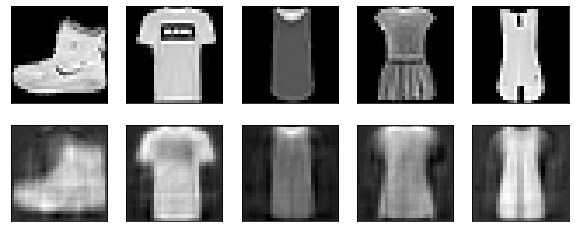

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.015628
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.013169
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.054383
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.029177
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.027584
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.022076
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.022495
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.020360
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.023658
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.020076
[Epoch 2]


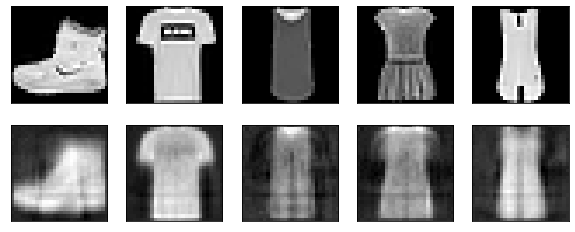

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.020136
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.020016
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.017654
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.017100
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.017340
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.015815
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.015573
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.014407
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.016750
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.017377
[Epoch 3]


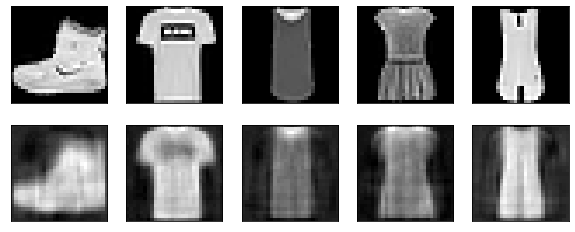

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.015915
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.015069
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.015412
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.015999
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.015843
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.014772
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.015477
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.015447
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.014034
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.014254
[Epoch 4]


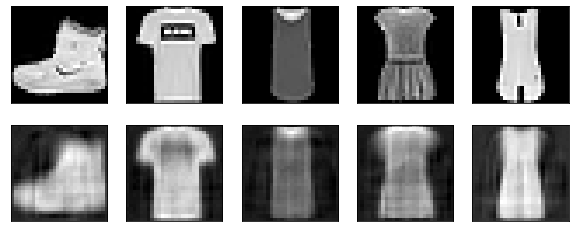

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.015113
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.012684
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.015140
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.015470
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.014432
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.013693
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.013611
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.012843
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.013789
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.016185
[Epoch 5]


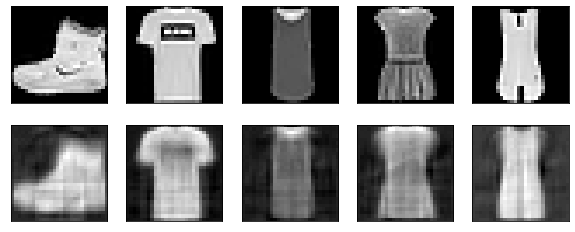

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.014951
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.014680
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.015724
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.013124
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.015244
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.014695
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.014816
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.012782
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.013092
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.015160
[Epoch 6]


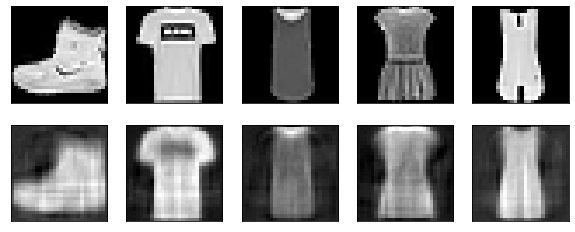

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.014217
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.013337
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.014007
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.013525
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.016886
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.012528
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.012113
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.014675
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.013250
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.013092
[Epoch 7]


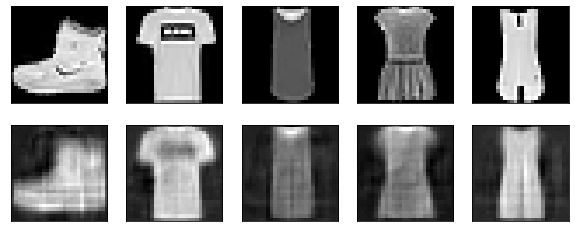

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.013077
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.011638
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.015647
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.013617
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.013255
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.012551
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.012106
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.013338
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.013215
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.012149
[Epoch 8]


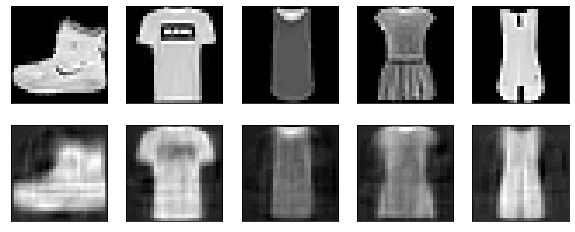

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.013109
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.015429
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.013622
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.011705
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.015137
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.014932
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.013872
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.015673
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.013738
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.015059
[Epoch 9]


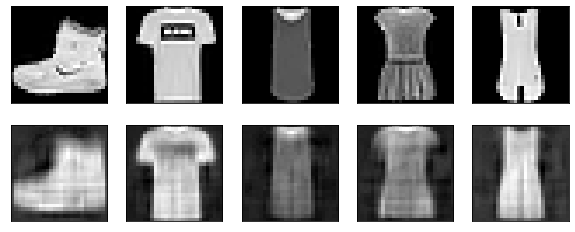

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.013709
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.011767
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.012800
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.013056
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.013489
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.014909
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.013486
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.013207
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.015551
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.014782
[Epoch 10]


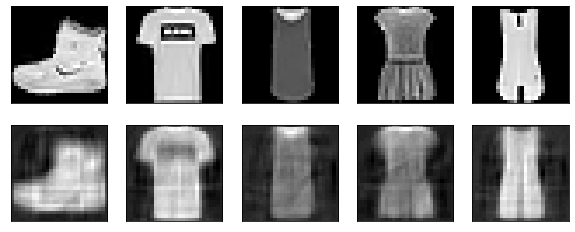

In [10]:
# 하이퍼볼릭 탄젠트가 ReLU보다 낫지 않을까?
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Sequential( # 784 -> 64로 압축
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential( # 64 -> 784
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss() # 원래 데이터로 복원이 되야 하기 때문.

print("Model: ", model)
print('Device: ', DEVICE)

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print('[Epoch {}]'.format(epoch))
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28, 28))
        a[0][idx].imshow(img, cmap = 'gray')
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
        
    for idx in range(5):
        img = np.reshape(decoded_data.to('cpu').data.numpy()[idx], (28, 28))
        a[1][idx].imshow(img, cmap = 'gray')
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()

In [12]:
# !pip install lightgbm
# !pip install time
# lightgbm 을 이용해 MNIST를 Input으로 넣었을 때 분류 정확도를 예측.
import time
import lightgbm as lgb
from sklearn.metrics import accuracy_score
start = time.time()
lgb_dtrain = lgb.Dataset(data = trainset.train_data.view(-1, 28*28).numpy(), label = list(trainset.train_labels.numpy()))
lgb_param = {'max_depth': 10,
            'learning_rate': 0.001,
            'n_estimators': 20,
            'objective': 'multiclass',
            'num_class': len(set(list(trainset.train_labels.numpy()))) + 1}

num_round = 10000
lgb_model = lgb.train(params = lgb_param, num_boost_round = num_round, train_set = lgb_dtrain)
lgb_model_predict = np.argmax(lgb_model.predict(trainset.train_data.view(-1, 28 * 28).numpy()), axis = 1)
print('Accuracy: %.2f' % (accuracy_score(list(trainset.train_labels.numpy()), lgb_model_predict) * 100), '%')
print('Time: %.2f' % (time.time() - start), 'seconds')

c:\python\python38\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\python\python38\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\python\python38\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.387273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170881
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 783
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [I

In [13]:
trainset.train_labels.numpy()

c:\python\python38\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


array([9, 0, 0, ..., 3, 0, 5], dtype=int64)

In [14]:
trainset.train_data.view(-1, 28*28).numpy()[0]

c:\python\python38\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [15]:
train_encoded_x = trainset.train_data.view(-1, 28*28).to(DEVICE)
train_encoded_x = train_encoded_x.type(torch.FloatTensor)
train_encoded_x = train_encoded_x.to(DEVICE)
encoded_data, decoded_data = model(train_encoded_x)
encoded_data = encoded_data.to('cpu')

start = time.time()
lgb_dtrain = lgb.Dataset(data = encoded_data.detach().numpy(), label = list(trainset.train_labels.numpy()))
lgb_param = {'max_depth': 10,
            'learning_rate' : 0.001,
            'n_estimators': 20,
            'objective': 'multiclass',
            'num_class': len(set(list(trainset.train_labels.numpy()))) + 1}

num_round = 10000
lgb_model = lgb.train(params = lgb_param, num_boost_round = num_round, train_set = lgb_dtrain)
lgb_model_predict = np.argmax(lgb_model.predict(encoded_data.detach().numpy()), axis = 1)
print('Accuracy: %.2f' % (accuracy_score(list(trainset.train_labels.numpy()), lgb_model_predict) * 100), '%')
print('Time: %.2f' % (time.time() - start), 'seconds')

c:\python\python38\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16320
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 64
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Inf

In [17]:
encoded_data.detach().numpy()[0] # 64차원 데이터값.

array([-0.75794387, -0.3004946 ,  0.10029018, -0.5310138 , -0.41238293,
        0.7694416 , -0.64359325, -0.5812084 , -0.98834074,  0.9515204 ,
        0.07288667, -0.4533331 ,  0.24925679,  0.23349217, -0.31504005,
        0.00484801, -0.8652046 , -0.9902042 , -0.7769414 ,  0.5559643 ,
       -0.7223859 ,  0.66070807,  2.3954525 , -0.8976702 ,  0.3464019 ,
       -0.27229205, -2.2369275 , -0.12715699, -0.16253528,  0.19226131,
        2.9188495 , -0.04995205, -0.45424888,  0.15122394, -0.05891651,
        0.5847198 , -0.22641245, -0.05273334,  0.43901035,  0.8680315 ,
       -0.6192015 , -1.0860885 , -0.08792262,  0.4200711 ,  0.37393048,
       -0.02623385, -0.23730136,  0.38013092,  0.4512218 , -0.01581226,
       -0.26200712, -0.60999256,  0.60693735,  0.24008363, -0.41182318,
        0.52184707, -0.35035154, -1.2107114 ,  0.7375003 , -0.34418786,
       -0.23835796, -0.81676614, -0.4987225 ,  0.45968395], dtype=float32)